In [1]:
import numpy as np
from matplotlib import pylab as plt

In [49]:
def loss_fn(dist_x, dist_y, loss='median'):
    exp = 1
    if loss == 'mean':
        exp = 2
    
    loss_y = np.zeros(dist_x.shape)
    for c, p in enumerate(dist_x):
        loss_y[c] = sum(np.abs(p - dist_x)**exp * dist_y)
    return loss_y

### example

In [245]:
dist_y = np.array([1, 0, 0, 1, 1, 1])
dist_y = dist_y / sum(dist_y)
dist_x = np.linspace(1, len(dist_y), num=len(dist_y))

mean = sum(dist_y * dist_x)

sorted_cumsum = np.cumsum(np.sort(dist_y))
argmedian_l = np.min(np.argwhere(sorted_cumsum >= 0.5))
argmedian_u = np.min(np.argwhere(sorted_cumsum > 0.5))
median = (dist_x[argmedian_l] + dist_x[argmedian_u]) / 2

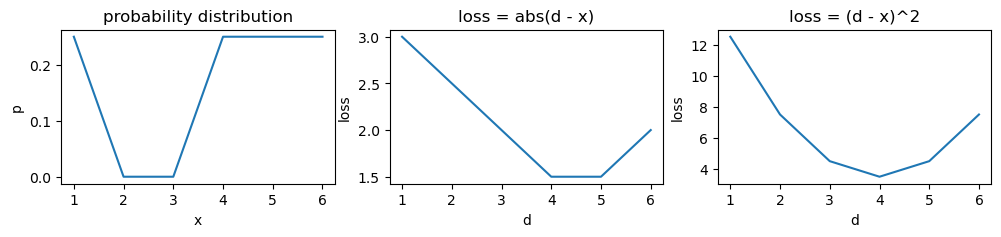

median: 4.5 mean: 4.0
median minimizes abs(d-x) and mean minimizes (d-x)^2


In [257]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 2))
ax[0].plot(dist_x, dist_y)
ax[0].set_title("probability distribution")
ax[0].set_ylabel("p")
ax[0].set_xlabel("x")
ax[1].plot(dist_x, loss_fn(dist_x, dist_y, loss='median'))
ax[1].set_title("loss = abs(d - x)")
ax[1].set_ylabel("loss")
ax[1].set_xlabel("d")
ax[2].plot(dist_x, loss_fn(dist_x, dist_y, loss='mean'))
ax[2].set_title("loss = (d - x)^2")
ax[2].set_ylabel("loss")
ax[2].set_xlabel("d")
plt.show()

print("median: " + str(median), "mean: " + str(mean))
print("median minimizes abs(d-x) and mean minimizes (d-x)^2")